<a id='intro'></a>
# Data Analysis 

 **In God we trust, all others bring data.** - *The Elements of Statistical Learning*

Big Data, Data Analytics, Data Science etc are the common buzzwords of the data world. So much so that data is considered to be the "new oil". There are excellent data-specific programming tools like SAS, R, Hadoop. Using a more generic scripting language like Python for data analysis is helpful as it allows for combination of data tasks with scientific programming.


One major issue for statistical programmers using Python, in the past has been the lack of libraries implementing standard models and a cohesive framework for specifying models. **Pandas**, the data analysis library which has been in development since 2008, aims to bridge this gap.

Pandas derives its name from  **pan**el **da**tasets, which is a commonly used term for multi-dimensional datasets encountered in statistics and econometrics.


<img src="http://radhakrishna.typepad.com/.a/6a00d83453b94569e20168e98eff44970c-pi" width="500" align = "center" />


Data analysis is only as good as its visualization. Today we will use a number of datasets in combination with the plotting library in Python; **matplotlib** to demonstrate our learnings. The notebook is structured as follows:

## Contents
- [Data Analysis](#intro)
- [Matplotlib](#mpl)
- [Data Analysis: pandas](#pandas)
    - [Series](#series)
    - [String methods](#smethods)
    - [Reading from a csv](#csv)
- [DataFrames](#df)
    - [Exercise 1: DataFrames](#ex1)
    - [Data Manipulation](#dm)
    - [Exercise 2: Data Extraction](#ex2)
    - [Plotting data](#plot)
    - [Missing Data](#missing)
    - [Excercise 3: DataFrame Methods](#ex3)
    - [More Manipulations](#mm)
- [Statistical Tests](#stats)
    - [Regression](#regression)
    - [T-Test](#ttest)
    - [Time Series](#ts)
- [Data Problem](#dp)
    - [Data Cleaning](#dc)
    - [Data Analysis](#da)
- [Miscellaneous plots](#oplot)
- [References](#refs)
- [Credits](#credits)





                   


In [2]:
#from __future__ import division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[15,3]

<a id='mpl'></a>
## Quick Overview of matplotlib

Matplotlib is the primary plotting library in Python. We will have a separate notebook dedicated to its features in a subsequent session. For the purpose of plotting with **pandas** today, we will touch upon the very basic plotting in **matplotlib**.

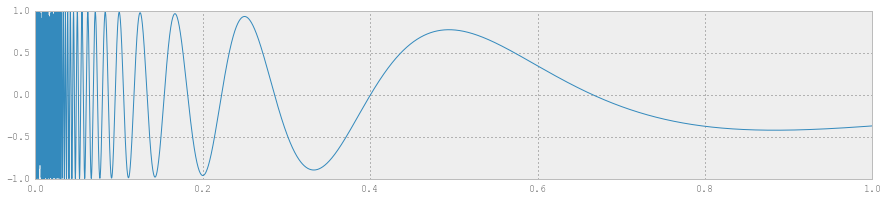

In [3]:
x = np.linspace(0, 1, 10001)
y = np.cos(np.pi/x) * np.exp(-x**2)

plt.plot(x, y)
plt.show()

* Plot the following equations over the domain $x \in \left[-1, 2\right]$.
    * $y = f(x) = x^2 \exp(-x)$
    * $y = f(x) = \log x$
    * $y = f(x) = 1 + x^x + 3 x^4$

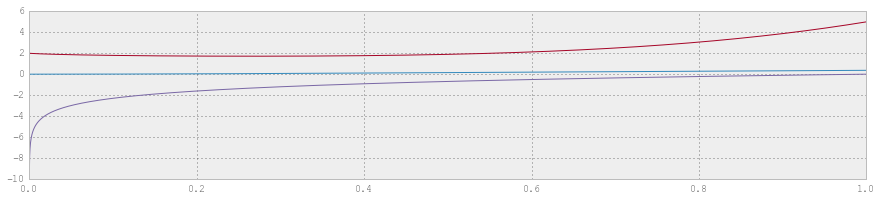

In [5]:
y1 = x**2 * np.exp(-x)
y2 = np.log(x)
y3 = 1 + x**x + 3*x**4

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

<a id='pandas'></a>

## Data analysis:  pandas

The pandas data analysis module provides data structures and tools for data analysis. It focuses on data handling and manipulation as well as linear and panel regression. It is designed to let you carry out your entire data workflow in Python without having to switch to a domain-specific language such as R. Although largely compatible with NumPy/SciPy, there are some important differences in indexing, data organization, and features. The basic Pandas data type is not `ndarray`, but Series and DataFrame. These allow you to index data and align axes efficiently.

<img src="https://docs.google.com/drawings/d/16Laq9U0qV3tglRiH4aHSq85_wmBaNQdF8wbzh8KFpMk/pub?w=939&h=541" width="500" align = "center" />



<a id='series'></a>
## Series 

A `Series` object is a one-dimensional array which can hold any data type. Like a dictionary, it has a set of indices for access (like keys); unlike a dictionary, it is ordered. Data alignment is intrinsic and will not be broken unless you do it explicitly. It is very similar to ndarray from NumPy.

An arbitrary list of values can be used as the index, or a list of axis labels (so it can act something like a `dict`).

In [6]:
s = pd.Series([1,5,float('NaN'),7.5,2.1,3])
print(s)

0    1.0
1    5.0
2    NaN
3    7.5
4    2.1
5    3.0
dtype: float64


In [7]:
dates = pd.date_range('20140201', periods=s.size)
s.index = dates
print(s)

2014-02-01    1.0
2014-02-02    5.0
2014-02-03    NaN
2014-02-04    7.5
2014-02-05    2.1
2014-02-06    3.0
Freq: D, dtype: float64


In [8]:
letters = ['A', 'B', 'Ch', '#', '#', '---']
s.index = letters
print(s)
print('\nAccess is like a dictionary key:\ns[\'---\'] = '+str(s['---']))
print('\nRepeat labels are possible:\ns[\'#\']=\n'+str(s['#']))

A      1.0
B      5.0
Ch     NaN
#      7.5
#      2.1
---    3.0
dtype: float64

Access is like a dictionary key:
s['---'] = 3.0

Repeat labels are possible:
s['#']=
#    7.5
#    2.1
dtype: float64


NumPy functions expecting an ndarray often do just fine with Series as well.

In [9]:
t = np.exp(s)
print(t)

A         2.718282
B       148.413159
Ch             NaN
#      1808.042414
#         8.166170
---      20.085537
dtype: float64


<a id='smethods'></a>
## String Methods

Series is equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the Series’s str attribute and generally have names matching the equivalent (scalar) built-in string methods:

In [13]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [14]:
s2 = pd.Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'])
s2

0    a_b_c
1    c_d_e
2      NaN
3    f_g_h
dtype: object


<table>
<tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>cat</td>
<td>Concatenate strings</td>
</tr>
<tr>
<td>split</td>
<td>Split strings on delimiter</td>
</tr>
<tr>
<td>get</td>
<td>Index into each element (retrieve i-th element</td>
</tr>
<tr>
<td>join</td>
<td>Join strings in each element of the Series with passed separator</td>
</tr>
<tr>
<td>contains</td>
<td>Return boolean array if each string contains pattern/regex</td>
</tr>
<tr>
<td>replace</td>
<td>Replace occurrences of pattern/regex with some other string</td>
</tr>
<tr>
<td>repeat</td>
<td>Duplicate values (s.str.repeat(3) equivalent to x * 3)</td>
</tr>
<tr>
<td>pad</td>
<td>Add whitespace to left, right, or both sides of strings</td>
</tr>
<tr>
<td>center</td>
<td>Equivalent to pad(side='both')</td>
</tr>
<tr>
<td>wrap</td>
<td>Split long strings into lines with length less than a given width</td>
</tr>
<tr>
<td>slice</td>
<td>Slice each string in the Series</td>
</tr>
<tr>
<td>slice_replace</td>
<td>Replace slice in each string with passed value</td>
</tr>
<tr>
<td>count</td>
<td>Count occurrences of pattern</td>
</tr>
<tr>
<td>startswith</td>
<td>Equivalent to str.startswith(pat) for each element</td>
</tr>
<tr>
<td>endswith</td>
<td>Equivalent to str.endswith(pat) for each element</td>
</tr>
<tr>
<td>findall </td>
<td>Compute list of all occurrences of pattern/regex for each string</td>
</tr>
<tr>
<td>match</td>
<td>Call re.match on each element, returning matched groups as list</td>
</tr>
<tr>
<td>extract</td>
<td>Call re.match on each element, as match does, but return matched groups as strings for convenience.</td>
</tr>
<tr>
<td>len</td>
<td>Compute string lengths</td>
</tr>
<tr>
<td>strip</td>
<td>Equivalent to str.strip</td>
</tr>
<tr>
<td>rstrip</td>
<td>Equivalent to str.rstrip</td>
</tr>
<tr>
<td>lstrip</td>
<td>Equivalent to str.lstrip</td>
</tr>
<tr>
<td>lower</td>
<td>Equivalent to str.lower</td>
</tr>
<tr>
<td>upper</td>
<td>Equivalent to str.upper</td>
</tr>
</table>

<a id='csv'></a>
## Reading from a csv

In most data scenarios, you will receive a comma separated file, on which you will need to perform your analysis. Reading a `csv` file into Python can be achieved by using the `read_csv` function. We will use the date from [this website](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage), about how many people were on 7 different bike paths in Montreal, each day. Let's use the data from 2012.

In [15]:
broken_df = pd.read_csv('2012.csv')

#Look at the first 4 rows
broken_df[:4]

OSError: File b'2012.csv' does not exist

In [ ]:
fixed_df = pd.read_csv('2012.csv', index_col='Date')
fixed_df[:3]

<a id='df'></a>
##DataFrame

What we did when we read the `csv` file into `broken_df`, we created a 2 Dimensional data structure called a `DataFrame`. The `DataFrame` object is similar to a table or a spreadsheet in Excel, i.e. a 2D Matrix-like object. 

In [ ]:
s = pd.Series([1,5,float('NaN'),7.5,2.1,3])
df = pd.DataFrame(s, columns=['x'])
print(df)

In [ ]:
t=np.exp(s)
df['exp(x)'] = t
df['exp(exp(x))'] = np.exp(t)
print(df)

There are a number of ways to access the elements of a `DataFrame`.

In [ ]:
print(df['x'], '\n')     #column
#letters = ['A', 'B', 'Ch', '#', '#', '---']
#df.index=letters
#print(df.loc['#'], '\n') #row by label
#print(df.iloc[3], '\n')  #row by number (note the transposition in output!)
print(df[1:4])     #row by slice

<a id='ex1'></a>
## Exercise 1 : DataFrames

In [ ]:
df1=pd.DataFrame(np.random.randn(dates.size,4),index=dates,columns=list('ABCD'))
print df1

Using the `DataFrame df1` created above, perform the following operations:

    1. df1.head() and df1.tail()
    2. df1.describe()
    3. df1.T
    4. df1.sort(columns='B')
    5. df1.columns, df1.index, df1.values

<a id='dm'></a>
## DataFrames: Data Manipulation

Now let us look at the cyclist DataFrame we created.  To extract a column from the DataFrame, 

We can use **Boolean indexing** on columns to extract information satisfying our desired conditions. For example, if I wished to extract all data from the cyclist data set where the value in the column `Berri 1` is greater than 1000,

In [ ]:
from pandas.util.testing import rands
df=pd.DataFrame(np.random.randn(dates.size,4),index=dates,columns=list('ABCD'))
print df

In [ ]:
df[df.B>0]

In [ ]:
df[df > 0]

In [ ]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
print df2

In [ ]:
df2[df2['E'].isin(['one'])]

In [ ]:
df.at[dates[0],'A'] = 0
print df

In [ ]:
df.iat[0,1] = 0
print df

<a id='ex2'></a>
## Exercise 2 : Conditional data extraction

In [ ]:
from random import randint
df = pd.DataFrame({'A': [randint(1, 9) for x in xrange(10)],
                   'B': [randint(1, 9)*10 for x in xrange(10)],
                   'C': [randint(1, 9)*100 for x in xrange(10)]})
print df

Find the entries from *A* for which corresponding values for *B* will be greater than 50, and those in *C*   equal to 900

<a id='plot'></a>
### Plotting Data

In [ ]:
fixed_df['Berri 1'].plot()

<a id='missing'></a>
## Missing Data

Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

As data comes in many shapes and forms, `pandas` aims to be flexible with regard to handling missing data. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “null”.

In [ ]:
df= pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print df

In [ ]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
print df1

In [ ]:
df1.loc[dates[0]:dates[1],'E'] = 1
print df1

Missing values propogate through arithmetic operations.

In [ ]:
df2=pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print df2
df2.loc[dates[0]:dates[2],'B']=float('NaN')
print df2
print df1+df2

But this can be avoided by using built-in methods, that exclude missing values.

In [ ]:
df1['A'].sum()

In [ ]:
df1.mean(1)

In [ ]:
df2.cumsum()

In [ ]:
#Gaussian numbers histogram
from numpy.random import normal
n = 1000
x = pd.Series(normal(size=n))
#print x
avg = x.mean()
std = x.std()

x_avg  = pd.Series(np.ones(n)* avg)
x_stdl = pd.Series(np.ones(n)*(avg-std))
x_stdh = pd.Series(np.ones(n)*(avg+std))

df_gauss=pd.DataFrame({'A':x_stdl,'B':x_stdh,'x':x})

df_gauss.plot(style=['rx','rx','bx'])
plt.figure()
df_gauss['x'].diff().hist(color='g', bins=50)

<a id='ex3'></a>
## Exercise 3: DataFrame methods

In [ ]:
df=pd.DataFrame(np.random.randn(5,5), columns=list('ABCDE'))
print df

Try the following with `df` as defined above:

    1. df.mean()
    2. df.apply(np.cumsum)
    3. df.apply(lambda x: x.max() - x.min())
    4. Plot a histogram

In [ ]:
df.apply(lambda x: x.max() - x.min())
#What does lambda do?

In [ ]:
def f(x):
...     return x*2
g = lambda x: x*2 

print g(3)

<a id='mm'></a>
### More manipulations

In [ ]:
from pandas import read_csv
from urllib import urlopen
page = urlopen("http://econpy.pythonanywhere.com/ex/NFL_1979.csv")
df = read_csv(page)
print df[:3]

In [ ]:
df1=df[0:10]

In [ ]:
print df1

In [ ]:
A=df1[:3]
B=df1[3:7]
C=df1[7:10]
print A,B,C

In [ ]:
parts=[A,B,C]
df2=pd.concat(parts)
print df2

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right= pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print left
print right 

In [ ]:
pd.merge(left, right, on='key')

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [ ]:
rowadd=df.iloc[3]

In [ ]:
print rowadd,df

In [ ]:
df.append(rowadd,ignore_index=True)

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
print df

In [ ]:
df.groupby('A').sum()

In [ ]:
df.groupby(['A','B']).sum()

<a id='stats'></a>
## Statistical Tests

`pandas` allows for using some built-in statistical methods to compare, fit or interpolate data. 

<a id='regression'></a>
### Regression

Regression analysis refers to the process of estimating relationships between variables. Linear regression is equivalent to fitting a line between to sets of data points (x,y)

$$y_i(x) = a_0 + a_1x_i $$

In [ ]:

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
url = "http://vincentarelbundock.github.com/Rdatasets/csv/HistData/Guerry.csv"
df = pd.read_csv(url)
#print df
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()


In [ ]:

mod = sm.ols(formula='Lottery ~ Literacy ', data=df)
res = mod.fit()
print res.summary()
intercept, slope =res.params

In [ ]:
xtest=np.linspace(1,100,100)
ytest=intercept+slope*xtest

In [ ]:
plt.plot(df['Literacy'],df['Lottery'],'kx')
plt.plot(xtest,ytest,'r')
plt.show()

<a id='ttest'></a>
### T-Test

The t-test assesses whether the means of two groups are statistically different from each other.

In [ ]:

town1_heights = pd.Series([5, 6, 7, 6, 7.1, 6, 4])
town2_heights = pd.Series([5.5, 6.5, 7, 6, 7.1, 6])

town1_mean = town1_heights.mean()
town2_mean = town2_heights.mean()

print "Town 1 avg. height", town1_mean
print "Town 2 avg. height", town2_mean

print "Effect size: ", abs(town1_mean - town2_mean)

df=pd.DataFrame({'T1':town1_heights,'T2':town2_heights})
b=df.boxplot()

In [ ]:
from scipy import stats

print "Town 1 Shapiro-Wilks p-value", stats.shapiro(town1_heights)[1]

print " T-Test p-value:", stats.ttest_ind(town1_heights, town2_heights,equal_var = False)[1]

<a id='ts'></a>
### Time Series

A time series is a sequence of data points, measured typically at successive points in time spaced at uniform time intervals. 

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
print rng

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.plot()

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts=ts.cumsum()
ts.plot()

In [ ]:
#Bar plot

ts = pd.DataFrame(np.random.randn(1000,5), index=pd.date_range('1/1/2000', periods=1000))
ts=ts.cumsum()
print ts.ix[5]
ts.ix[5].plot(kind='bar'); plt.axhline(0, color='k')

<a id='dp'></a>
## Data Problem

Imagine yourself to be a sales analyst at an apparel company. Your boss asks you to look at weather data from the past year to understand the weather data over the months, so that you can have the right apparel on display at the appropriate time.

You can get the data from [here](http://climate.weather.gc.ca/index_e.html) (so your company is Canadian). The template for downloading the data is:



In [ ]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

Usually in data tasks, there are no specified objectives. One needs to play around with the data in order to derive inferences. While this might seem like a vague and daunting task, it simply requires a start and once you get familiar with the data, you will eventually find some patterns and will be able to make an initial set of conclusions.

Here let's start with the data for March 2012 (there seems to be less data for the more recent years).

<a id='dc'></a>

### Data Cleaning

In [ ]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True, encoding='latin1')

In [ ]:
weather_mar2012

We are only interested in the temperatures, so let's go ahead and plot the column for the month of March,2012. But we also see that the Temp column has some special characters, which might be painful to reuse. So, let's fix that first!


In [ ]:
weather_mar2012.columns = [
    u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']

In [ ]:
weather_mar2012[u'Temp (C)'].plot(figsize=(15, 5))

There are also many columns with NA values. We cannot use them in any of our analyses, so we can go ahead and drop them.

We managed to clean up some of the data for March 2012. That's great, but we are also interested in the entire year's data. 

In [ ]:
##Pandas cookbook
def download_weather_month(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

In [ ]:
#Saving to a csv


<a id='da'></a>
### Data Analysis

`pandas` provides vectorized string functions, to make it easy to operate on columns containing text.

In [ ]:
weather_description = weather_2012['Weather']


Let's now try to find the month where it snowed the most, so that your company can have extra stock of those down jackets for this month. 

<a id='oplot'></a>
## Other kinds of Plotting 
### Scatter plots

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
print df
#df.plot(kind='bar')
#df.plot(kind='bar', stacked=True)
#df.plot(kind='barh', stacked=True)
#print pd.__version__


In [ ]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(100, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, figsize=(7, 7), diagonal='kde')

### Parallel Coordinates

In [ ]:
from pandas import read_csv
from urllib import urlopen
from pandas.tools.plotting import andrews_curves 

page = urlopen("https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv")
df = read_csv(page)
andrews_curves(df, 'Name')

from pandas.tools.plotting import parallel_coordinates

#parallel_coordinates(df,'Name')


### Lag plots

In [ ]:
from pandas.tools.plotting import lag_plot
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

<a id='refs'></a>
## References
- [Pandas cookbook](https://github.com/jvns/pandas-cookbook)
- [Pandas Data Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html/). 
- [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html/).
- [On Andrew's curves](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode9.html)
- [Parallel coordinates](http://en.wikipedia.org/wiki/Parallel_coordinates)

---
<a id='credits'></a>
## Credits

Neal Davis and Lakshmi Rao developed these materials for [Computational Science and Engineering](http://cse.illinois.edu/) at the University of Illinois at Urbana–Champaign.

<img src="http://i.creativecommons.org/l/by/3.0/88x31.png" align="left">
This content is available under a [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0/).

[![](https://bytebucket.org/davis68/resources/raw/f7c98d2b95e961fae257707e22a58fa1a2c36bec/logos/baseline_cse_wdmk.png?token=be4cc41d4b2afe594f5b1570a3c5aad96a65f0d6)](http://cse.illinois.edu/)